In [1]:
%pip install pandas
%pip install matplotlib
%pip install openpyxl

You should consider upgrading via the 'c:\Users\fenpon\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\fenpon\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\fenpon\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import script.common

C:\Users\fenpon\AppData\Local\Temp\ipykernel_58252\3069021116.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  convertDf[now] = convertDf[now].fillna(0)
C:\Users\fenpon\AppData\Local\Temp\ipykernel_58252\3069021116.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  convertDf[now] = convertDf[now].fillna(0)
C:\Users\fenpon\AppData\Local\Temp\ipykernel_58252\3069021116.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To op

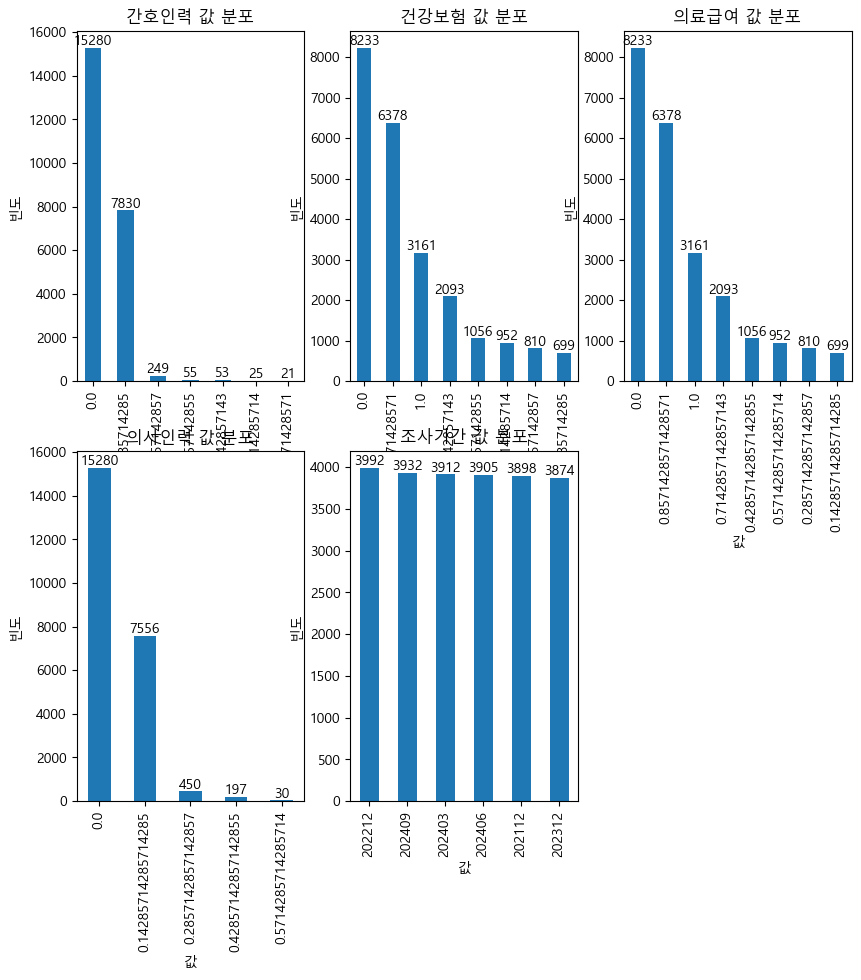

유형코드명,암호화요양기호,조사기간,levels
0,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.500000
1,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.500000
2,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.428571
3,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.500000
4,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.500000
...,...,...,...
3927,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNTgxMzUxIzMxIyQyIy...,202409,0.214286
3928,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNTgxMzUxIzMxIyQyIy...,202409,0.071429
3929,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNTgxMzUxIzQxIyQxIy...,202409,0.428571
3930,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNTgxOTYxIzExIyQyIy...,202409,0.142857


In [3]:
import pandas as pd

# 간호등급 데이터
# 두 DataFrame을 암호화요양기호를 기준으로 병합

paths = [
    './data/hospital/level/2021_12_level.xlsx','./data/hospital/level/2022_12_level.xlsx','./data/hospital/level/2023_12_level.xlsx',
         './data/hospital/level/2024_03_level.xlsx','./data/hospital/level/2024_06_level.xlsx','./data/hospital/level/2024_09_level.xlsx'
         ]

dates = [202112,202212,202312,202403,202406,202409]



arr = []
_index = 0

levels = ['간호인력',	'건강보험',	'의료급여',	'의사인력']
for path in paths:
    df = pd.read_excel(path)
    # 피벗 테이블을 이용해 유형코드명을 열로, 간호등급을 값으로 변환
    convertDf = df.pivot_table(index='암호화요양기호', columns='유형코드명', values='간호등급', aggfunc='first')
    convertDf = convertDf.drop(columns=['건강보험(환자수)','의료급여(환자수)'])

    for now in levels:
        convertDf[now] = convertDf[now].fillna(0)
        convertDf[now]  = pd.to_numeric(convertDf[now], errors='coerce')
        #최대 등급 기준으로 정규화
        convertDf[now] = (convertDf[now])/7.0

    convertDf = convertDf.reset_index()
    convertDf['조사기간'] = dates[_index]
    #display(convertDf)
    arr.append(convertDf)
    _index += 1



merged_df = pd.concat(arr)
looks = ['간호인력',	'건강보험',	'의료급여',	'의사인력','조사기간']
script.common.lookCount(merged_df,looks)
#전체 합해서 비율을 구함
merged_df['levels'] = merged_df[levels].sum(axis=1) / len(levels)
merged_df.drop(columns=levels, inplace=True)
display(merged_df)
"""
# 21년도와 24년도의 간호등급 차이를 보여주는 데이터 프레임
# 두 데이터프레임 병합
merged_df = pd.merge(cf_21, cf_24, on='암호화요양기호', suffixes=('_df1', '_df2'))

# 같은 열의 값 빼기
for now in ['간호인력',	'건강보험',	'의료급여',	'의사인력']:
    merged_df[now] = merged_df[f'{now}_df1'] - merged_df[f'{now}_df2']

"""




merged_df.to_csv('./export/hospital/2021_2024_09_hospitalLevels.csv', index=False, encoding='utf-8')  # index=False로 행 번호 제외


first = merged_df.iloc[0]['암호화요양기호'] == merged_df['암호화요양기호']


#시간대별로 학습시 변화량 알기위해 출력
#lookLine(merged_df[first],'조사기간','levels')

장비코드,암호화요양기호,조사기간,equitments
0,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.000689
1,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.009116
2,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.016635
3,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.000344
4,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.012938


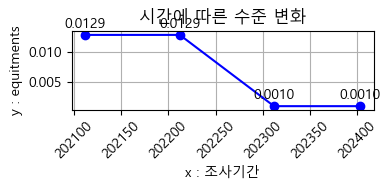

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# 간호등급 데이터
# 두 DataFrame을 암호화요양기호를 기준으로 병합

paths = ['./data/hospital/equitments/2021_12_equitment.xlsx','./data/hospital/equitments/2022_12_equitment.xlsx','./data/hospital/equitments/2023_12_equitment.xlsx',
         './data/hospital/equitments/2024_03_equitment.xlsx','./data/hospital/equitments/2024_06_equitment.xlsx','./data/hospital/equitments/2024_09_equitment.xlsx',]

dates = [202112,202212,202312,202403,202406,202409]

arr = []
_index = 0


for path in paths:
    df = pd.read_excel(path)
    # 피벗 테이블을 이용해 유형코드명을 열로, 간호등급을 값으로 변환
    convertDf = df.pivot_table(index='암호화요양기호', columns='장비코드', values='장비대수', aggfunc='first')
    convertDf = convertDf.fillna(0)
    convertDf = convertDf.reset_index()
    convertDf['조사기간'] = dates[_index]
    #print(convertDf.columns)
    arr.append(convertDf)
    _index+=1
cols = convertDf.columns
cols = cols[~cols.isin(['암호화요양기호' , '조사기간'])]

merged_df = pd.concat(arr)

for col in cols:
    #최소-최대 정규화 -> 전체중 몇프로정도 차지 하는지 변경
    normalized = (merged_df[col] - merged_df[col].min()) / (merged_df[col].max() - merged_df[col].min())
    merged_df[col]= normalized
merged_df['equitments'] = 0
#전체 비율을 더한후 최대치 즉 모든 장비 비중이 100%일때 장비 항목이 14개니까 14.0으로 나눈 비율 
merged_df['equitments'] += merged_df[cols].sum(axis=1)/ len(cols)
merged_df.drop(columns=cols, inplace=True)


display(merged_df.head(5))
merged_df.describe()


first = merged_df.iloc[4]['암호화요양기호'] == merged_df['암호화요양기호']

#시간대별로 학습시 변화량 알기위해 출력
script.common.lookLine(merged_df[first],'조사기간','equitments')

In [5]:
sorted_df = merged_df.sort_values(by='equitments', ascending=False)
sorted_df.head(10)

merged_df.to_csv('./export/hospital/2021_2024_09_hospitalEquitments.csv', index=False, encoding='utf-8')  # index=False로 행 번호 제외

# 추후 간호등급 df의 levels 랑 의료장비 df의 equitments의 조사시기별 변화량을 학습 시켜 회귀하면 연도별 예측값을 측정가능


In [6]:
import pandas as pd

equitDf = pd.read_csv('./export/hospital/2021_2024_09_hospitalEquitments.csv')
lvDf = pd.read_csv('./export/hospital/2021_2024_09_hospitalLevels.csv')

result = pd.merge(equitDf, lvDf, on=['암호화요양기호','조사기간'], how='inner')
result

,암호화요양기호,조사기간,equitments,levels
0,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.000689,0.500000
1,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.009116,0.428571
2,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.016635,0.428571
3,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.000344,0.500000
4,JDQ4MTAxMiM1MSMkMSMkMCMkMTMkMzgxMTkxIzExIyQxIy...,202112,0.012938,0.500000
...,...,...,...,...
15172,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNTgxMzUxIzMxIyQyIy...,202409,0.028085,0.214286
15173,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNTgxMzUxIzMxIyQyIy...,202409,0.012938,0.071429
15174,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNTgxMzUxIzQxIyQxIy...,202409,0.016979,0.428571
15175,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNTgxOTYxIzExIyQyIy...,202409,0.016180,0.142857


In [7]:
_index = 0
paths = ['./data/hospital/main/2021_12_main.xlsx','./data/hospital/main/2022_12_main.xlsx','./data/hospital/main/2023_12_main.xlsx',
         './data/hospital/main/2024_03_main.xlsx','./data/hospital/main/2024_06_main.xlsx','./data/hospital/main/2024_09_main.xlsx']
times = [202112,202212,202312,202403,202406,202409]


arr = []
for path in paths:
    mainDf = pd.read_excel(path)
    mainDf['조사기간'] = times[_index]
    mainDf = mainDf[mainDf['시도코드명'] == '서울']   
   
    arr.append(mainDf)
    _index += 1

mainDfMerged = pd.concat(arr)
mainDfMerged.to_csv('./export/hospital/2021_2024_09_main.csv', index=False, encoding='utf-8')  # index=False로 행 번호 제외

mainDfMerged.drop(columns=['우편번호'],inplace=True)


In [8]:

common_keys = mainDfMerged['조사기간'].isin(result['조사기간'])
print("공통 '암호화요양기호' 값 개수:", common_keys.sum())

공통 '암호화요양기호' 값 개수: 112927


In [9]:
mergeMainDf = pd.merge(mainDfMerged, result, on=['암호화요양기호','조사기간'], how='inner')
mergeMainDf.head(2)

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,주소,...,한방전문의 인원수,x좌표,y좌표,조사기간,병원홈페이지,조산사 인원수,좌표(X),좌표(Y),equitments,levels
0,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경희대학교병원,1,상급종합,110000,서울,110007,동대문구,NaN,서울특별시 동대문구 경희대로 23 (회기동),...,0,127.051852,37.594119,202112,NaN,NaN,NaN,NaN,0.208719,0.071429
1,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,한양대학교병원,1,상급종합,110000,서울,110011,성동구,NaN,서울특별시 성동구 왕십리로 222-1 (사근동),...,0,127.044134,37.559657,202112,NaN,NaN,NaN,NaN,0.164827,0.071429


In [10]:
mergeMainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   암호화요양기호     2265 non-null   object 
 1   요양기관명       2265 non-null   object 
 2   종별코드        2265 non-null   int64  
 3   종별코드명       2265 non-null   object 
 4   시도코드        2265 non-null   int64  
 5   시도코드명       2265 non-null   object 
 6   시군구코드       2265 non-null   int64  
 7   시군구코드명      2265 non-null   object 
 8   읍면동         1555 non-null   object 
 9   주소          2265 non-null   object 
 10  전화번호        2260 non-null   object 
 11  병원URL       177 non-null    object 
 12  개설일자        2265 non-null   object 
 13  총의사수        2265 non-null   int64  
 14  의과일반의 인원수   2265 non-null   int64  
 15  의과인턴 인원수    2265 non-null   int64  
 16  의과레지던트 인원수  2265 non-null   int64  
 17  의과전문의 인원수   2265 non-null   int64  
 18  치과일반의 인원수   2265 non-null   int64  
 19  치과인턴 인원수    2265 non-null  

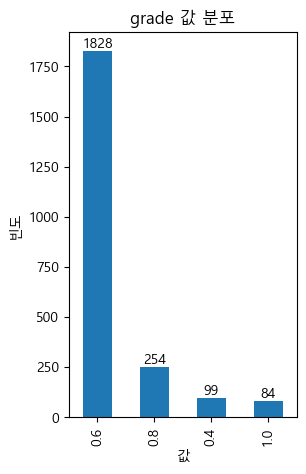

In [11]:

hospital_weights = [
    1.0,  # 상급종합병원
    0.8,   # 종합병원, 한방종합병원
    0.6,   # 병원, 요양병원, 정신병원, 한방병원, 치과병원
    0.4,   # 의원, 치과의원, 보건소, 보건지소, 모자보건센터, 한의원
    0.2    # 조산원, 보건진료소
]
hospitalclassific = [
    [1],#상급종합
    [11,91],#종합병원 ,한방종합 
    [21, 28, 29, 92, 41],#병원, 요양병원, 정신병원, 한방병원, 치과병원
    [31, 51,  71, 72, 74, 93],#의원, 치과의원, , 보건소, 보건지소, 모자보건센터, 한의원
    [61,73] #조산원, 보건진료소
]
 
for index, group in enumerate(hospitalclassific):
    ind = mergeMainDf['종별코드'].isin(group)
    mergeMainDf.loc[ind,'grade'] = hospital_weights[index]
script.common.lookCount(mergeMainDf,['grade'])



In [12]:
convertedDf = mergeMainDf[['grade','equitments','levels']]
convertedDf

,grade,equitments,levels
0,1.0,0.208719,0.071429
1,1.0,0.164827,0.071429
2,1.0,0.218374,0.071429
3,1.0,0.430460,0.071429
4,1.0,0.190506,0.071429
...,...,...,...
2260,0.6,0.016635,0.428571
2261,0.6,0.000344,0.428571
2262,0.6,0.000344,0.142857
2263,0.6,0.000344,0.357143


In [13]:
mergeMainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   암호화요양기호     2265 non-null   object 
 1   요양기관명       2265 non-null   object 
 2   종별코드        2265 non-null   int64  
 3   종별코드명       2265 non-null   object 
 4   시도코드        2265 non-null   int64  
 5   시도코드명       2265 non-null   object 
 6   시군구코드       2265 non-null   int64  
 7   시군구코드명      2265 non-null   object 
 8   읍면동         1555 non-null   object 
 9   주소          2265 non-null   object 
 10  전화번호        2260 non-null   object 
 11  병원URL       177 non-null    object 
 12  개설일자        2265 non-null   object 
 13  총의사수        2265 non-null   int64  
 14  의과일반의 인원수   2265 non-null   int64  
 15  의과인턴 인원수    2265 non-null   int64  
 16  의과레지던트 인원수  2265 non-null   int64  
 17  의과전문의 인원수   2265 non-null   int64  
 18  치과일반의 인원수   2265 non-null   int64  
 19  치과인턴 인원수    2265 non-null  

In [14]:
mergeMainDf.to_csv('./export/hospital/hospital_convert_main.csv', index=False, encoding='utf-8')  # index=False로 행 번호 제외

In [15]:
good_rating_list = ['고혈압', '당뇨병'] #양호로 표시되는 등급 리스트

def convertEvalution(evaluation):
        evaluation['평가등급'] = evaluation['평가등급'].astype(str)

        evaluation['평가등급'] = evaluation['평가등급'].str.strip()
        evaluation['평가등급'] =evaluation['평가등급'].str.replace(" ", "")
        evaluation.loc[evaluation['평가등급'] == '-', '평가등급'] = '0등급'
        evaluation.loc[evaluation['평가등급'] == '등급제외', '평가등급'] = '0등급'
    
        evaluation.loc[evaluation['평가등급'] == '비교제외', '평가등급'] = '0등급'
        evaluation.loc[evaluation['평가등급'] == '제외', '평가등급'] = '0등급'
        evaluation.loc[evaluation['평가등급'] == '평가제외', '평가등급'] = '0등급'
        evaluation.loc[evaluation['평가등급'] == '평가대상제외', '평가등급'] = '0등급'
        

        
        evaluation['평가등급'] = evaluation['평가등급'].str.strip().str.replace('등급', '')
        
        isGood = evaluation['평가항목'].isin(good_rating_list)
        evaluation.loc[isGood,'평가등급'] = (evaluation.loc[isGood, '평가등급'] == '양호')
        evaluation['평가등급'] = evaluation['평가등급'].astype(int)


        evaluation.loc[~isGood,'평가등급'] = 6 - evaluation.loc[~isGood,'평가등급'] # 최대 5등급인데 등급 분류를 안받은 경우 6으로 지정 되게하여 5등급 보다 큰값을 가지게 함
        return evaluation


In [16]:
def convertEvalution2(evaluation,tags):
    result = []
    for tag in tags:
        newRow = pd.DataFrame({'병원명' : evaluation['병원명'],'평가등급': evaluation[tag],'평가항목' : tag,'소재지' : evaluation['소재지']})
        newRow = convertEvalution(newRow)
        
        result.append(newRow)
       
    return result


In [17]:


evaluations = []
for i in range(1,31):
    print("---- " , i)
    evaluation = pd.read_excel(f'./data/hospital/quality/병원평가{i}.xls')
    if i == 22: #약국 관련데이터 예외처리
        #인공수정 지표 #체외수정 지표
        newRows = convertEvalution2(evaluation,['인공수정 지표','체외수정 지표'])
        for row in newRows:
            evaluations.append(row)
    elif i == 27:
        newRows = convertEvalution2(evaluation,['고관절치환술','췌장암수술','식도암수술','조혈모세포이식술','위암','간암'])
        for row in newRows:
            evaluations.append(row)
    else:
        evaluation = convertEvalution(evaluation)
        evaluations.append(evaluation[['병원명', '평가등급', '평가항목','소재지']])
        #lookCount(evaluation,['병원명'])

#evaluation['병원명']
    #script.common.lookCount(evaluation,['평가등급'])





----  1
----  2
----  3
----  4


c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

----  5


c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


----  6


c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


----  7


c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


----  8
----  9
----  10
----  11
----  12
----  13


c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

----  14


c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


----  15
----  16


c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


----  17


c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

----  18
----  19
----  20
----  21
----  22
----  23
----  24
----  25


c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

----  26
----  27
----  28
----  29
----  30


c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\fenpon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [18]:
evDFs = pd.concat(evaluations)
evDFs = evDFs[evDFs['소재지'].str.contains('서울특별시', na=False)]
evDFs

,병원명,평가등급,평가항목,소재지
2,가톨릭대학교 은평성모병원,5,관상동맥우회술,"서울특별시 은평구 통일로 1021, (진관동)"
5,강동경희대학교의대병원,5,관상동맥우회술,"서울특별시 강동구 동남로 892, (상일동)"
7,강북삼성병원,5,관상동맥우회술,"서울특별시 종로구 새문안로 29, (평동)"
8,건국대학교병원,5,관상동맥우회술,"서울특별시 광진구 능동로 120-1, (화양동)"
24,삼성서울병원,5,관상동맥우회술,"서울특별시 강남구 일원로 81, (일원동, 삼성의료원)"
...,...,...,...,...
59,제이에이치제일의원,6,결핵,"서울특별시 중구 퇴계로 244, 1~4층 (충무로5가)"
60,좋은숨김동규내과재활의학과의원,6,결핵,"서울특별시 영등포구 시흥대로 635, 대림메디컬빌딩 2층 (대림동)"
61,채내과의원,6,결핵,"서울특별시 서대문구 세검정로 32, 지1,1,2,5층 (홍제동)"
62,한솔병원,6,결핵,"서울특별시 송파구 송파대로 445, 한솔병원 (석촌동)"


In [19]:
#mergeMainDf['요양기관명'] == evDFs['병원명']
#merged_df = pd.merge(mergeMainDf, evDFs, left_on='요양기관명', right_on='병원명', how='inner')
#merged_df = merged_df.drop(columns=['병원명'])
# '평가항목'을 열로 확장하고, '평가등급'을 값으로 설정하는 피벗 테이블 생성
# 1. '평가항목'을 열로, '평가등급'을 값으로 설정하는 피벗 테이블 생성
pivot_evDFs = evDFs.pivot_table(index='병원명', columns='평가항목', values='평가등급', aggfunc='first').reset_index()
pivot_evDFs = pivot_evDFs.fillna(0)
pivot_evDFs['medicalLevel'] =  pivot_evDFs.drop(columns=['병원명']).sum(axis=1)

merged_df = pd.merge(mergeMainDf, pivot_evDFs[['병원명','medicalLevel']], left_on='요양기관명', right_on='병원명', how='inner')
merged_df.drop(columns='병원명', inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   암호화요양기호       1865 non-null   object 
 1   요양기관명         1865 non-null   object 
 2   종별코드          1865 non-null   int64  
 3   종별코드명         1865 non-null   object 
 4   시도코드          1865 non-null   int64  
 5   시도코드명         1865 non-null   object 
 6   시군구코드         1865 non-null   int64  
 7   시군구코드명        1865 non-null   object 
 8   읍면동           1300 non-null   object 
 9   주소            1865 non-null   object 
 10  전화번호          1860 non-null   object 
 11  병원URL         147 non-null    object 
 12  개설일자          1865 non-null   object 
 13  총의사수          1865 non-null   int64  
 14  의과일반의 인원수     1865 non-null   int64  
 15  의과인턴 인원수      1865 non-null   int64  
 16  의과레지던트 인원수    1865 non-null   int64  
 17  의과전문의 인원수     1865 non-null   int64  
 18  치과일반의 인원수     1865 non-null 

In [20]:
merged_df.head(2)

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,주소,...,y좌표,조사기간,병원홈페이지,조산사 인원수,좌표(X),좌표(Y),equitments,levels,grade,medicalLevel
0,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경희대학교병원,1,상급종합,110000,서울,110007,동대문구,NaN,서울특별시 동대문구 경희대로 23 (회기동),...,37.594119,202112,NaN,NaN,NaN,NaN,0.208719,0.071429,1.0,143.0
1,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,한양대학교병원,1,상급종합,110000,서울,110011,성동구,NaN,서울특별시 성동구 왕십리로 222-1 (사근동),...,37.559657,202112,NaN,NaN,NaN,NaN,0.164827,0.071429,1.0,139.0


In [21]:
merged_df.to_csv('./export/hospital/2021_2024_09_hospital3features.csv', index=False, encoding='utf-8')  # index=False로 행 번호 제외

In [22]:
%pip install scikit-learn

You should consider upgrading via the 'c:\Users\fenpon\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_df['medicalLevel'] = scaler.fit_transform(merged_df[['medicalLevel']])

sorted_df = merged_df.sort_values(by='medicalLevel', ascending=False)
sorted_df.head(3)



,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,주소,...,y좌표,조사기간,병원홈페이지,조산사 인원수,좌표(X),좌표(Y),equitments,levels,grade,medicalLevel
38,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,서울특별시보라매병원,11,종합병원,110000,서울,110008,동작구,NaN,서울특별시 동작구 보라매로5길 20 (신대방동),...,37.493441,202112,NaN,NaN,NaN,NaN,0.180253,0.071429,0.8,1.0
1578,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,서울특별시보라매병원,11,종합병원,110000,서울,110008,동작구,신대방동,"서울특별시 동작구 보라매로5길 20, (신대방동)",...,NaN,202409,http://www.brmh.org,0.0,126.923906,37.493441,0.191211,0.071429,0.8,1.0
307,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,재단법인아산사회복지재단 서울아산병원,1,상급종합,110000,서울,110018,송파구,NaN,서울특별시 송파구 올림픽로43길 88 서울아산병원 (풍납동),...,NaN,202212,http://www.amc.seoul.kr,0.0,127.107935,37.526576,0.582537,0.071429,1.0,1.0


In [24]:
orderCols = ['grade','equitments','medicalLevel','levels'] # 실제 학습시키는 colums 순서와 같다.
trainDf = merged_df[orderCols]
trainDf.head(3)

,grade,equitments,medicalLevel,levels
0,1.0,0.208719,0.910256,0.071429
1,1.0,0.164827,0.884615,0.071429
2,1.0,0.218374,0.948718,0.071429


In [25]:
import pandas as pd
import numpy as np

def look3D(df, colPlot, texts, color_map):

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(
        np.sqrt(df[colPlot[0]]**2 + df[colPlot[1]]**2),
        np.sqrt(df[colPlot[2]]**2 + df[colPlot[3]]**2),
        df["hospitalScore"],
        c=color_map, marker='o'
    )
    
    for idx, row in pd.concat(texts).iterrows():
        x_coord = np.sqrt(df[colPlot[0]].iloc[idx]**2 + df[colPlot[1]].iloc[idx]**2)
        y_coord = np.sqrt(df[colPlot[2]].iloc[idx]**2 + df[colPlot[3]].iloc[idx]**2)

        ax.text(
            x_coord,
            y_coord,
            row['hospitalScore'],
            row['요양기관명'],
            fontsize=8
        )

    print(df.loc[df['요양기관명'] == '재단법인아산사회복지재단 서울아산병원', 'cluster'])

    ax.set_xlabel(colPlot[0] + " + " + colPlot[1] + " = x")
    ax.set_ylabel(colPlot[2] + " + " + colPlot[3] + " = y")
    ax.set_zlabel("hospitalScore")
    ax.set_title('주석이 포함된 3D 산점도')

    plt.tight_layout()
    plt.show()

array([[0.58538588, 0.01775468, 0.10786388, 0.27131715],
       [0.87410714, 0.2024979 , 0.84329212, 0.10459184],
       [0.6463357 , 0.04047851, 0.4027702 , 0.33890578]])

,요양기관명,grade,equitments,medicalLevel,levels,cluster,class
1239,재단법인아산사회복지재단 서울아산병원,1.0,0.625703,1.000000,0.071429,1,0.0
1556,재단법인아산사회복지재단 서울아산병원,1.0,0.623637,1.000000,0.071429,1,0.0
920,삼성서울병원,1.0,0.616774,0.961538,0.071429,1,0.0
615,삼성서울병원,1.0,0.615529,0.961538,0.071429,1,0.0
925,재단법인아산사회복지재단 서울아산병원,1.0,0.603077,1.000000,0.071429,1,0.0


,요양기관명,grade,equitments,medicalLevel,levels,cluster,class
293,연세에스의원,0.4,0.000689,0.102564,0.428571,0,2.0
605,연세에스의원,0.4,0.000689,0.102564,0.428571,0,2.0
909,연세에스의원,0.4,0.000689,0.102564,0.428571,0,2.0
1222,연세에스의원,0.4,0.000689,0.102564,0.428571,0,2.0
1539,연세에스의원,0.4,0.000689,0.102564,0.428571,0,2.0


C:\Users\fenpon\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


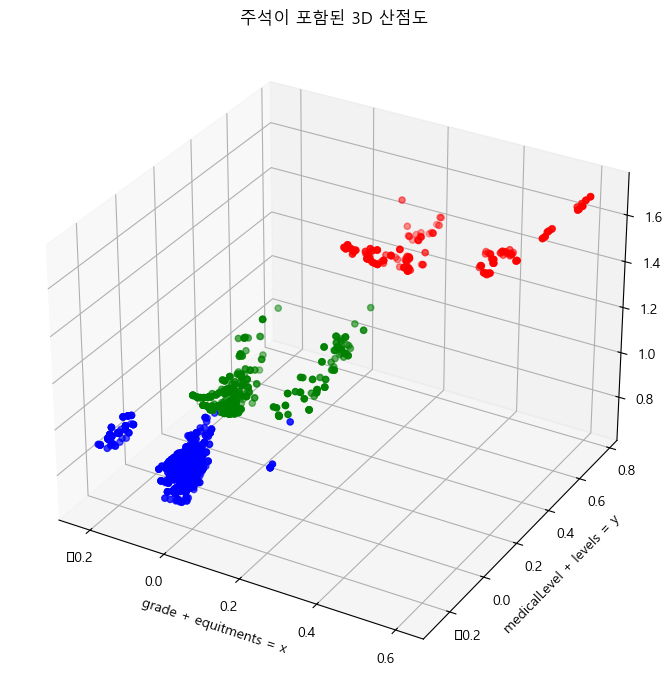

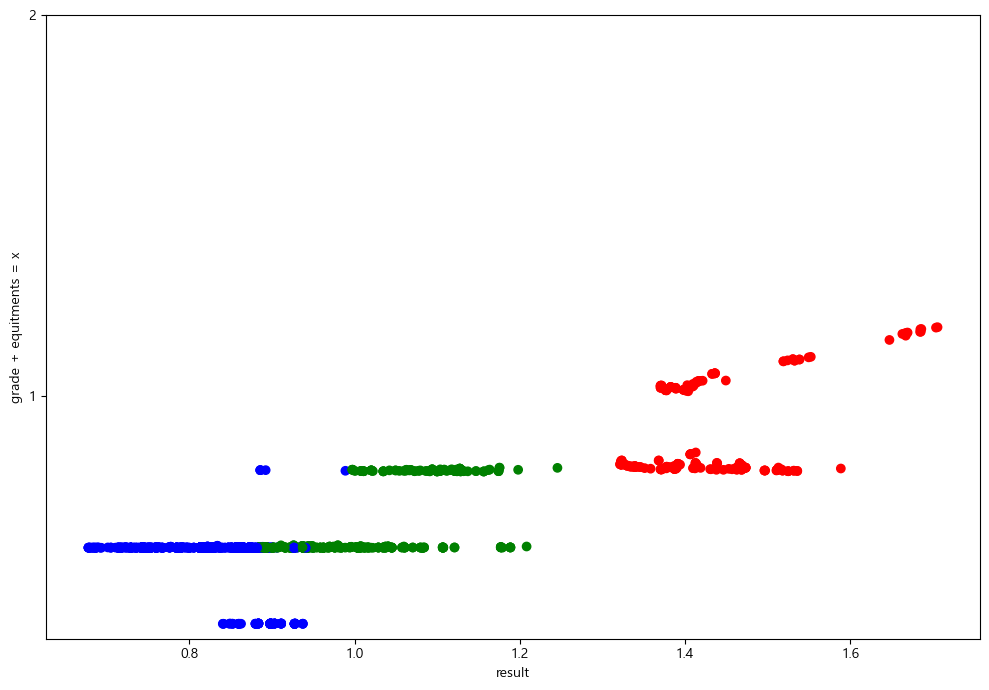

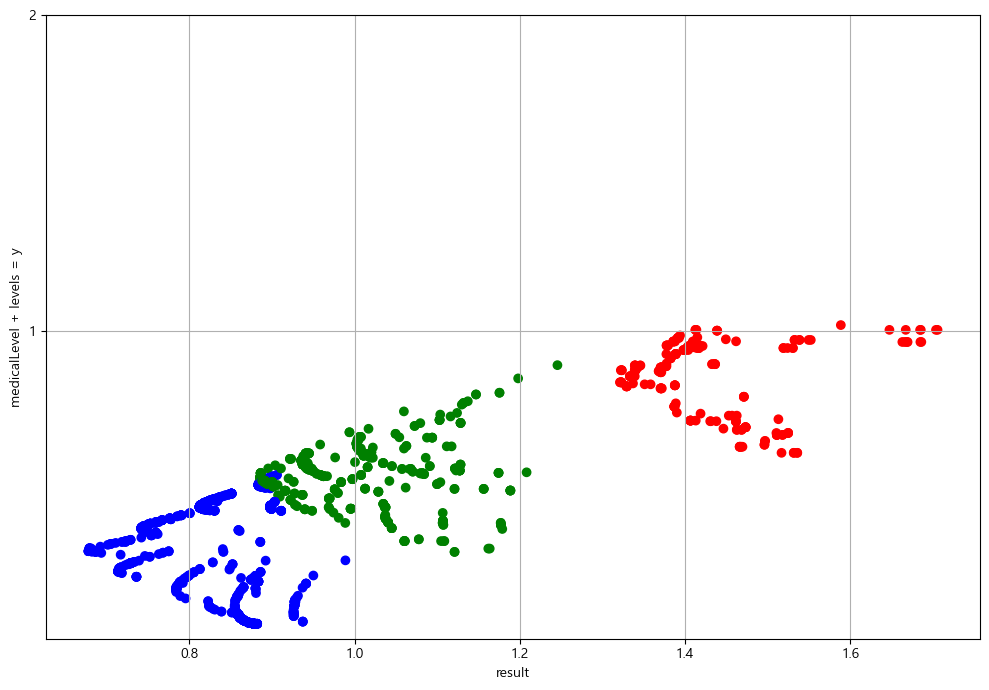

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import script.common


classes = ['상','중','하']
colors = ['r','g','b']

kmeans = KMeans(n_clusters=3, random_state=42)  # 3개의 클러스터로 나누기
merged_df['cluster'] = kmeans.fit_predict(trainDf)

centroids = kmeans.cluster_centers_
display(centroids)

merged_df['DistanceToCenter'] = merged_df.apply(
    lambda row: np.linalg.norm(row[orderCols] - centroids[row['cluster']]),  # 유클리드 거리 계산
    axis=1
)
originDistance = np.linalg.norm(centroids, axis=1)

merged_df[merged_df['DistanceToCenter']  < originDistance[merged_df['cluster']]]['DistanceToCenter'] = merged_df['DistanceToCenter'] * -1
merged_df[merged_df['DistanceToCenter']  >= originDistance[merged_df['cluster']]]['DistanceToCenter'] = merged_df['DistanceToCenter'] * 1


merged_df["score"] = merged_df['DistanceToCenter'] + originDistance[merged_df['cluster']]

#거리가 가장 먼 centorid가 상위 구간이다

# 맨해튼 거리 값이 큰 순서대로 인덱스를 저장
classLevels = np.argsort(originDistance)[::-1]  # 내림차순 정렬

# cluster와 classLevels 비교 후, 특정 열 업데이트
for i, idx in enumerate(classLevels):
     merged_df.loc[merged_df['cluster'] == idx, 'class'] = int(i)   # 클래스 레벨 할당







# 클러스터링 결과 시각화

# 3D 산점도 생성
# x, y, z 축 데이터 설정

colPlot = ['grade','equitments','medicalLevel','levels'] 
top = merged_df.nlargest(5, ['grade','equitments','medicalLevel','levels','class'])
bottom = merged_df.nsmallest(5, ['grade','equitments','medicalLevel','levels','class'])

display(top[['요양기관명','grade','equitments','medicalLevel','levels','cluster','class']])
display(bottom[['요양기관명','grade','equitments','medicalLevel','levels','cluster','class']])

#의료 품질관련 지표가 필요할듯
#평가가 안된 작은 의원이 많아 이를 세세하게평가하려면 건강보험 당가등을 봐야할듯

color_map = [colors[int(cls) ] for cls in merged_df['class']]  # 클래스가 1부터 시작하므로 -1


script.common.look3ND(merged_df,colPlot,[],color_map,'') 


# 산점도 그리기
plt.figure(figsize=(10, 7))
plt.grid()
xCord = np.sqrt(merged_df[colPlot[0]]**2 + merged_df[colPlot[1]]**2)
plt.scatter(  merged_df["score"], xCord, c=color_map, marker='o')
plt.xlabel('result')
plt.ylabel(colPlot[0] + " + "+colPlot[1] + " = x" )


plt.yticks(np.arange(1, 3)) #  y축에 클러스트 넘버
plt.grid()
plt.tight_layout()
plt.show()

# 최종 의원 평가 산점도
plt.figure(figsize=(10, 7))
yCord = np.sqrt(merged_df[colPlot[2]]**2 + merged_df[colPlot[3]]**2)
plt.scatter( merged_df["score"], yCord, c=color_map, marker='o')
plt.xlabel('result')
plt.ylabel(colPlot[2] + " + "+colPlot[3] + " = y" )

plt.yticks(np.arange(1, 3))  #  y축에 클러스트 넘버
plt.grid()
plt.tight_layout()
plt.show()


merged_df.to_csv('./export/hospital/2021_2024_09_trainDatas.csv', index=False, encoding='utf-8')  # index=False로 행 번호 제외




In [27]:
merged_df[merged_df['class'] == 0]

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,주소,...,좌표(X),좌표(Y),equitments,levels,grade,medicalLevel,cluster,DistanceToCenter,score,class
0,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경희대학교병원,1,상급종합,110000,서울,110007,동대문구,NaN,서울특별시 동대문구 경희대로 23 (회기동),...,NaN,NaN,0.208719,0.071429,1.0,0.910256,1,0.146532,1.382311,0.0
1,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,한양대학교병원,1,상급종합,110000,서울,110011,성동구,NaN,서울특별시 성동구 왕십리로 222-1 (사근동),...,NaN,NaN,0.164827,0.071429,1.0,0.884615,1,0.141688,1.377467,0.0
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,학교법인 고려중앙학원 고려대학교의과대학부속병원(안암병원),1,상급종합,110000,서울,110012,성북구,NaN,서울특별시 성북구 고려대로 73 고려대병원 (안암동5가),...,NaN,NaN,0.218374,0.071429,1.0,0.948718,1,0.168272,1.404051,0.0
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강북삼성병원,1,상급종합,110000,서울,110016,종로구,NaN,서울특별시 종로구 새문안로 29 (평동),...,NaN,NaN,0.190506,0.071429,1.0,0.923077,1,0.153161,1.388940,0.0
4,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQyIy...,학교법인가톨릭학원가톨릭대학교서울성모병원,1,상급종합,110000,서울,110021,서초구,NaN,서울특별시 서초구 반포대로 222 (반포동),...,NaN,NaN,0.346420,0.071429,1.0,0.891026,1,0.199852,1.435631,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,한국보훈복지의료공단 중앙보훈병원,11,종합병원,110000,서울,110002,강동구,둔촌동,"서울특별시 강동구 진황도로61길 53, (둔촌동)",...,127.147869,37.530339,0.152407,0.142857,0.8,0.878205,1,0.103364,1.339143,0.0
1596,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,한국원자력의학원원자력병원,11,종합병원,110000,서울,110022,노원구,공릉동,"서울특별시 노원구 노원로 75, 한국원자력의학원 (공릉동)",...,127.082420,37.628867,0.274717,0.071429,0.8,0.711538,1,0.170782,1.406561,0.0
1597,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQyIy...,한림대학교 강남성심병원,11,종합병원,110000,서울,110013,영등포구,대림동,"서울특별시 영등포구 신길로 1, (대림동, 강남성심병원)",...,126.908653,37.493726,0.162145,0.071429,0.8,0.820513,1,0.093482,1.329261,0.0
1600,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,홍익병원,11,종합병원,110000,서울,110020,양천구,신정동,"서울특별시 양천구 목동로 225, 홍익병원본관 (신정동)",...,126.863655,37.528484,0.121279,0.214286,0.8,0.679487,1,0.225728,1.461507,0.0
